In [4]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import os
import numpy as np
import data_loading_plotting_fct as dlp

# Fitness, time

In [5]:
data_lines = []
for folder in os.listdir("/home/leni/m2w_logs/m2w_3/"):
    foldername = "/home/leni/m2w_logs/m2w_3/" + folder
    names = folder.split("_")
    synch = ""
    target = ""
    if names[0] == "swg":
        synch = "synchronous"
    elif names[0] == "awg":
        synch = "asynchronous"
    if len(names) == 3:
        target = names[2]
    else:
        target = "no target"
    for replicate in os.listdir(foldername):
        fit_lines = dlp.load_fitnesses_agg(foldername + "/" + replicate)
        data_lines += [[synch,target,replicate]+fit for fit in fit_lines]
fit_data = pd.DataFrame(data=data_lines,columns=["synchronicity","target delta","replicate","time","computation time","discretized time","Number of robots","number of robots","number of new individual","mean fit","median fit","std fit","max fit","min fit"])


## Asynchronous vs Synchronous

/home/leni/.local/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/leni/.local/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/leni/.local/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/leni/.local/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.

<Figure size 1440x720 with 0 Axes>

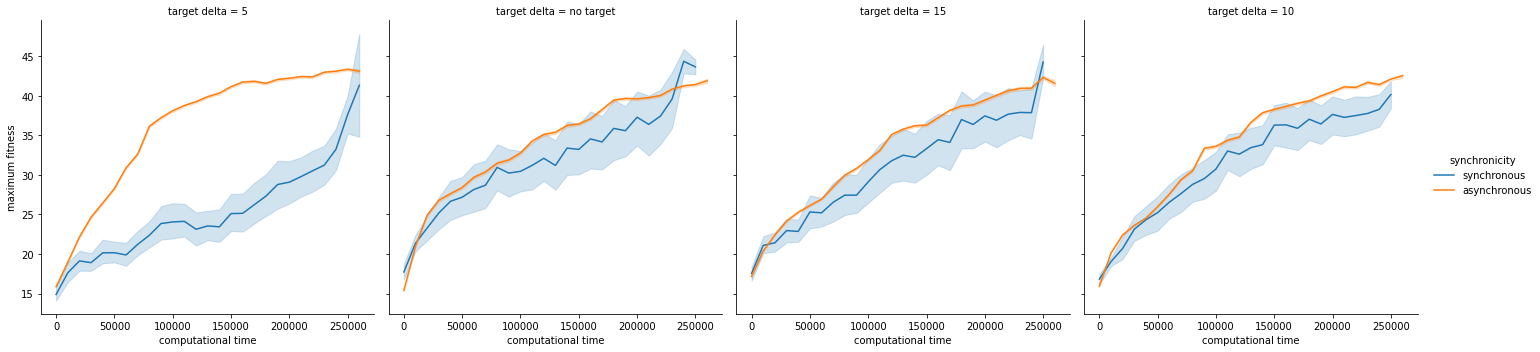

In [6]:
fig = plt.gcf()
fig.set_size_inches(20,10)
g = sns.relplot(data=fit_data,kind="line",x="discretized time",y="max fit",hue="synchronicity",col="target delta")
g.set_axis_labels("computational time","maximum fitness")


/home/leni/.local/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/leni/.local/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/leni/.local/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/leni/.local/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.

<Figure size 1440x720 with 0 Axes>

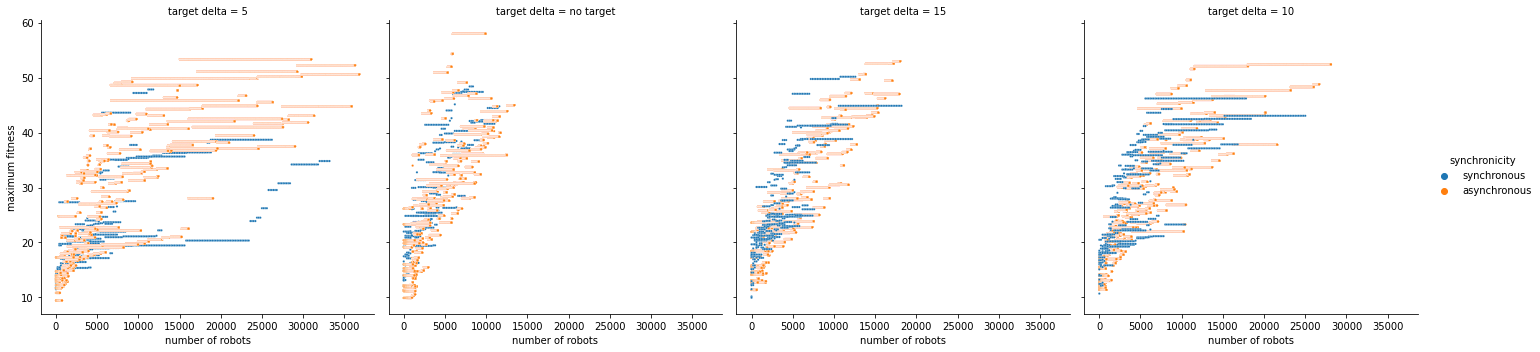

In [7]:
fig = plt.gcf()
fig.set_size_inches(20,10)
g = sns.relplot(data=fit_data,kind="scatter",s=5,x="number of robots",y="max fit",hue="synchronicity",col="target delta")
g.set_axis_labels("number of robots","maximum fitness")

/home/leni/.local/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/leni/.local/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/leni/.local/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/leni/.local/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.

<Figure size 1440x720 with 0 Axes>

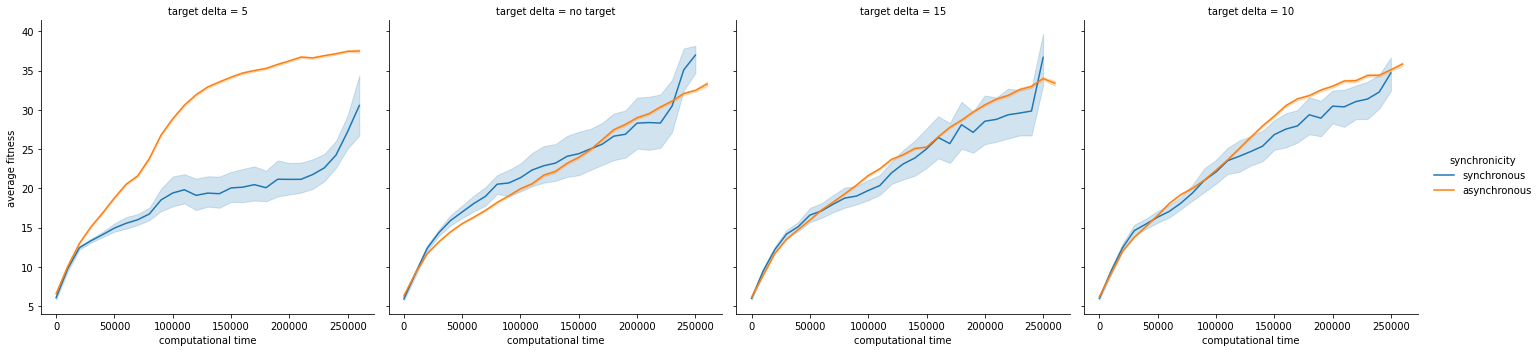

In [8]:
fig = plt.gcf()
fig.set_size_inches(20,10)
g = sns.relplot(data=fit_data,kind="line",x="discretized time",y="mean fit",hue="synchronicity",col="target delta")
g.set_axis_labels("computational time","average fitness")

/home/leni/.local/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/leni/.local/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/leni/.local/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/leni/.local/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.

<Figure size 1440x720 with 0 Axes>

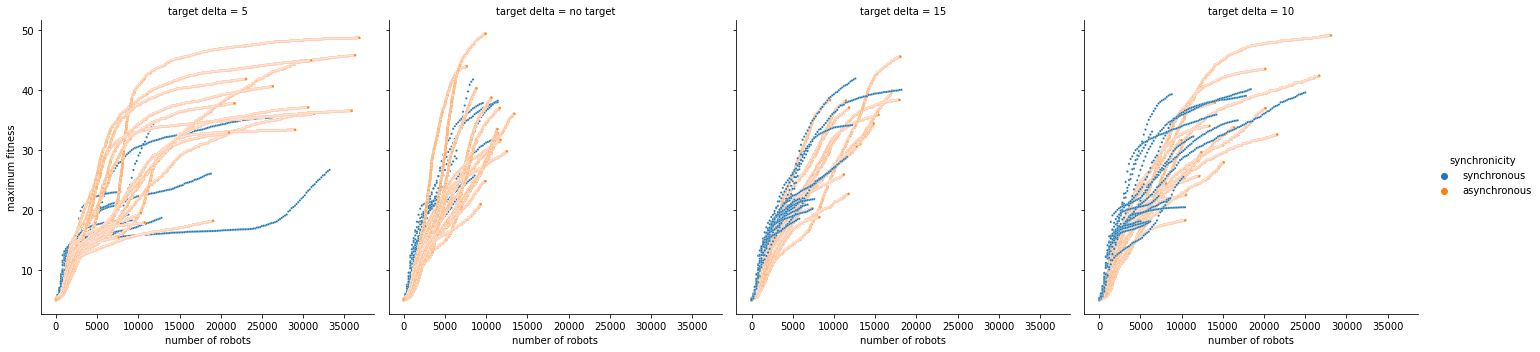

In [9]:
fig = plt.gcf()
fig.set_size_inches(20,10)
g = sns.relplot(data=fit_data,kind="scatter",s=5,x="number of robots",y="mean fit",hue="synchronicity",col="target delta")
g.set_axis_labels("number of robots","maximum fitness")

## Target Delta Values

/home/leni/.local/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/leni/.local/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/leni/.local/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/leni/.local/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.

Text(0, 0.5, 'average duration betwean EA update')

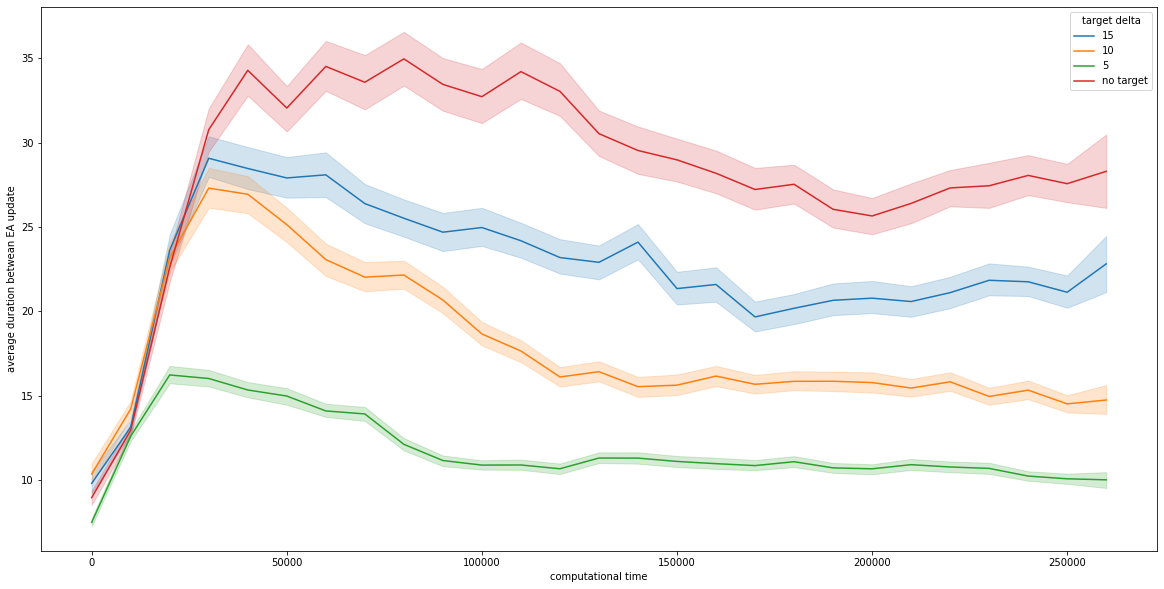

In [10]:
fig = plt.gcf()
fig.set_size_inches(20,10)
ax = sns.lineplot(data=fit_data.loc[fit_data["synchronicity"]=="asynchronous"],x="discretized time",y="time",hue="target delta")
ax.set_xlabel("computational time")
ax.set_ylabel("average duration betwean EA update")

/home/leni/.local/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/leni/.local/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/leni/.local/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/leni/.local/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.

Text(0, 0.5, 'average duration betwean EA update')

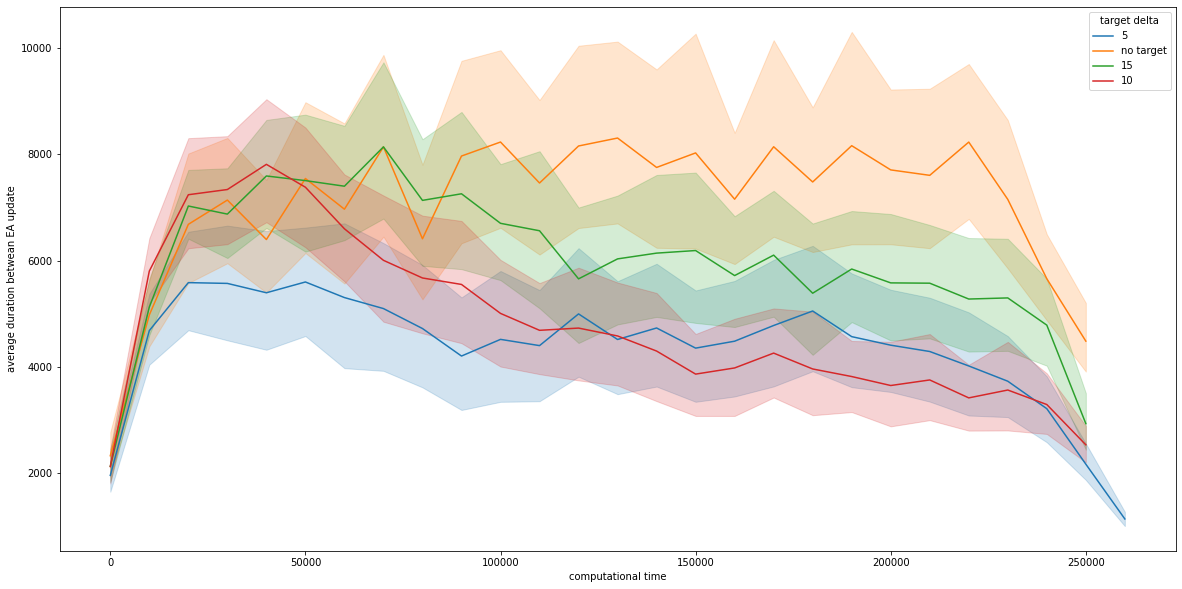

In [11]:
fig = plt.gcf()
fig.set_size_inches(20,10)
ax = sns.lineplot(data=fit_data.loc[fit_data["synchronicity"]=="synchronous"],x="discretized time",y="time",hue="target delta")
ax.set_xlabel("computational time")
ax.set_ylabel("average duration betwean EA update")

/home/leni/.local/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/leni/.local/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/leni/.local/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/leni/.local/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.

Text(0, 0.5, 'median fitness')

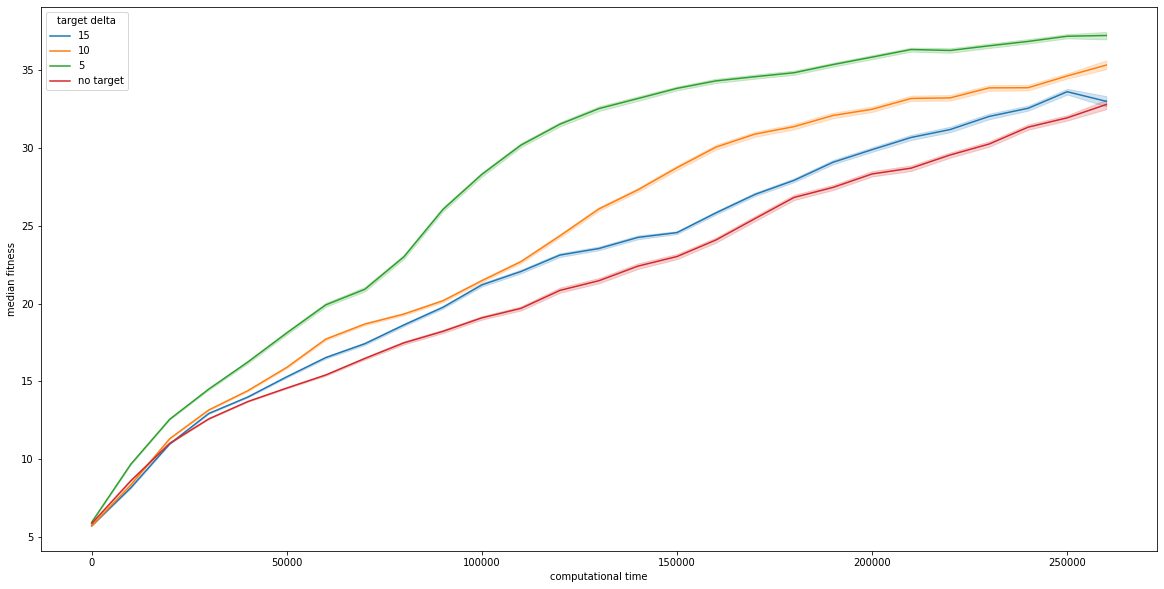

In [12]:
fig = plt.gcf()
fig.set_size_inches(20,10)
ax = sns.lineplot(data=fit_data.loc[fit_data["synchronicity"]=="asynchronous"],x="discretized time",y="median fit",hue="target delta")
ax.set_xlabel("computational time")
ax.set_ylabel("median fitness")

/home/leni/.local/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/leni/.local/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/leni/.local/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/leni/.local/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.

<Figure size 1440x720 with 0 Axes>

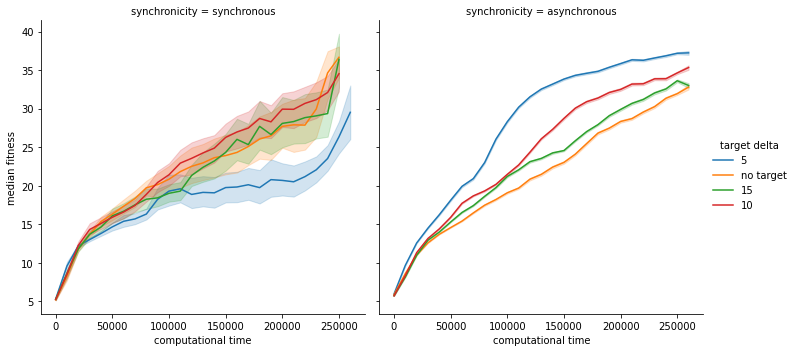

In [13]:
fig = plt.gcf()
fig.set_size_inches(20,10)
g = sns.relplot(data=fit_data,kind="line",x="discretized time",y="median fit",hue="target delta",col="synchronicity")
g.set_axis_labels("computational time","median fitness")

/home/leni/.local/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/leni/.local/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/leni/.local/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/leni/.local/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.

<Figure size 1440x720 with 0 Axes>

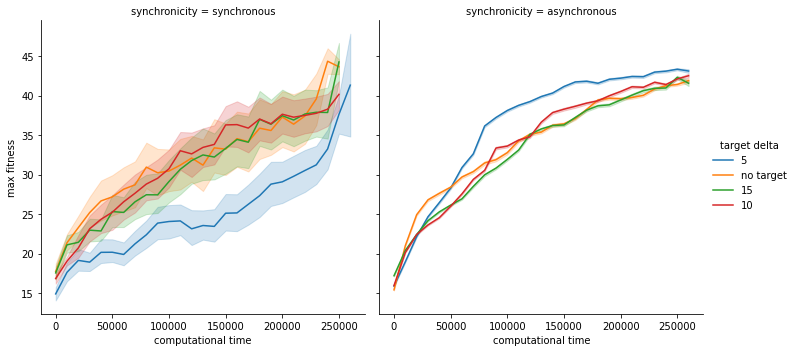

In [14]:
fig = plt.gcf()
fig.set_size_inches(20,10)
g = sns.relplot(data=fit_data,kind="line",x="discretized time",y="max fit",hue="target delta",col="synchronicity")
g.set_axis_labels("computational time","max fitness")

/home/leni/.local/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/leni/.local/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/leni/.local/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/leni/.local/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.

Text(0, 0.5, 'number of robots')

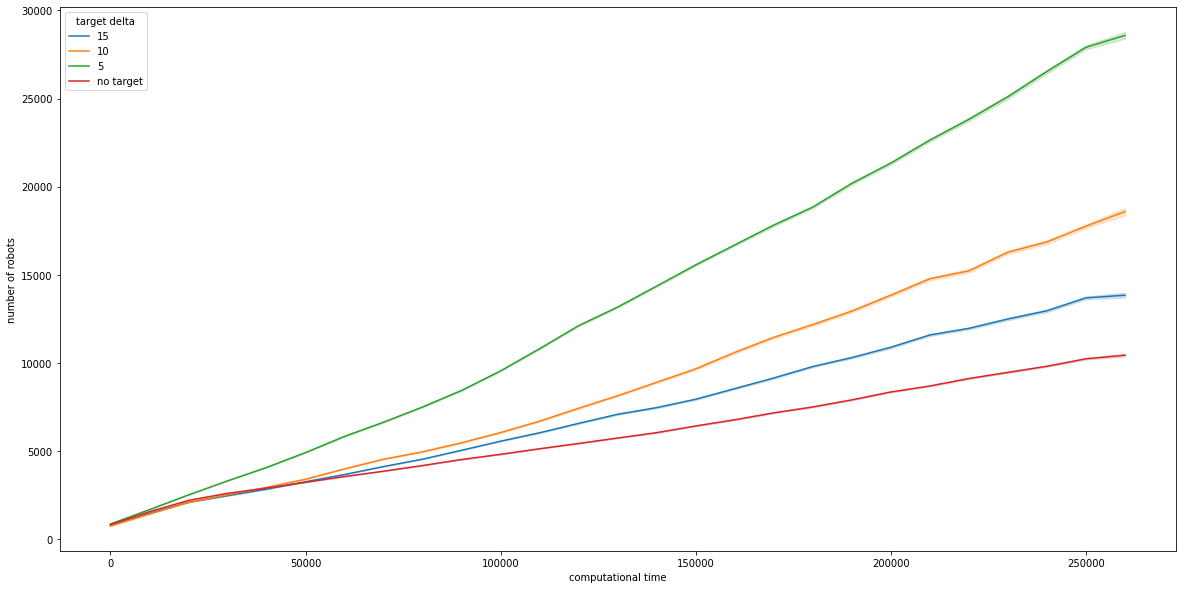

In [16]:
fig = plt.gcf()
fig.set_size_inches(20,10)
ax = sns.lineplot(data=fit_data.loc[fit_data["synchronicity"]=="asynchronous"],x="discretized time",y="number of robots",hue="target delta")
ax.set_xlabel("computational time")
ax.set_ylabel("number of robots")

## Max Fitness and Number of Robots

In [17]:
new_data_list = []
for sync in fit_data["synchronicity"].drop_duplicates():
    tmp_data = fit_data.loc[fit_data["synchronicity"]==sync]
    for td in tmp_data["target delta"].drop_duplicates():
        tmp_data = fit_data.loc[fit_data["synchronicity"]==sync].loc[fit_data["target delta"]==td]
        for rep in tmp_data["replicate"].drop_duplicates():
            new_data = pd.DataFrame(tmp_data.loc[tmp_data["replicate"]==rep].max())
            new_data_list.append(new_data.transpose())
max_data = pd.concat(new_data_list)
print(max_data)

   synchronicity target delta                                replicate  \
0    synchronous            5  m2w_2023_11_22_10_23_27_548238_15064935   
0    synchronous            5   m2w_2023_11_22_10_23_26_77981_10387690   
0    synchronous            5   m2w_2023_11_27_10_24_58_176223_9541016   
0    synchronous            5  m2w_2023_11_22_10_23_32_160714_15739004   
0    synchronous            5    m2w_2023_11_6_14_14_15_795076_5848738   
..           ...          ...                                      ...   
0   asynchronous    no target   m2w_2023_10_12_10_31_13_385063_9777672   
0   asynchronous    no target   m2w_2023_11_22_10_23_45_967870_1132175   
0   asynchronous    no target  m2w_2023_11_22_10_23_44_630416_14402721   
0   asynchronous    no target    m2w_2023_11_27_10_24_4_239616_4695201   
0   asynchronous    no target     m2w_2023_10_19_9_55_8_29122_11422600   

            time computation time discretized time Number of robots  \
0    8539.621379    243845.005062       

/home/leni/.local/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/leni/.local/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/leni/.local/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/leni/.local/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.

<Axes: xlabel='target delta', ylabel='number of robots'>

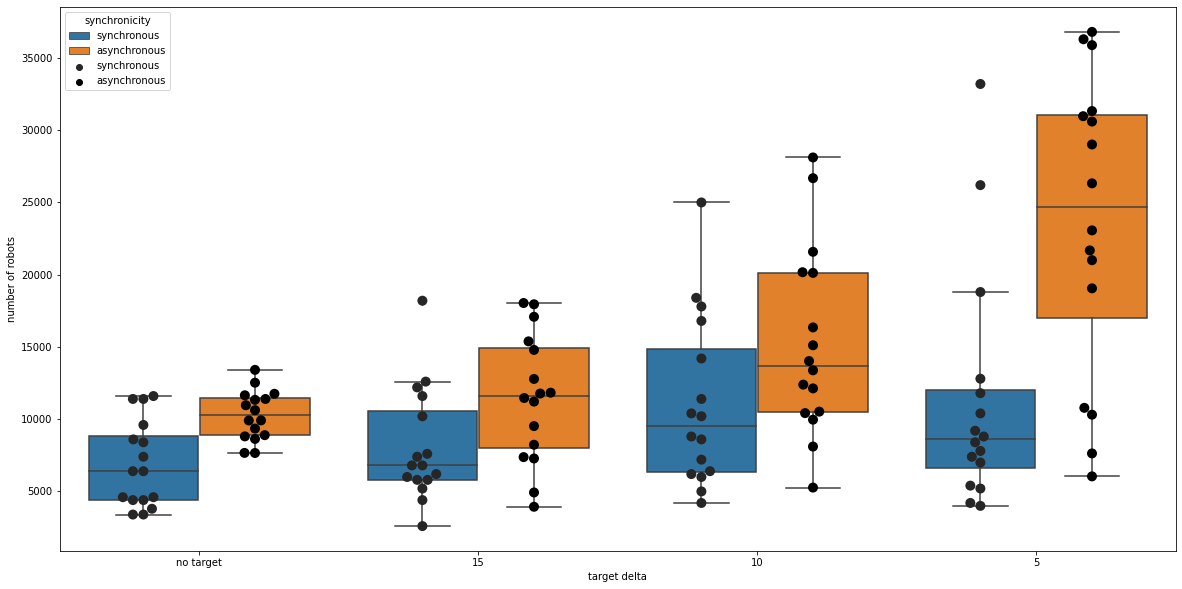

In [18]:
fig = plt.gcf()
fig.set_size_inches(20,10)
ax = sns.boxplot(data=max_data,x="target delta",y="number of robots",hue="synchronicity",order=["no target","15","10","5"])
sns.swarmplot(data=max_data,x="target delta",y="number of robots",hue="synchronicity",order=["no target","15","10","5"],s=10,color='k',dodge=True)

/home/leni/.local/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/leni/.local/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/leni/.local/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/leni/.local/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.

<Axes: xlabel='target delta', ylabel='max fit'>

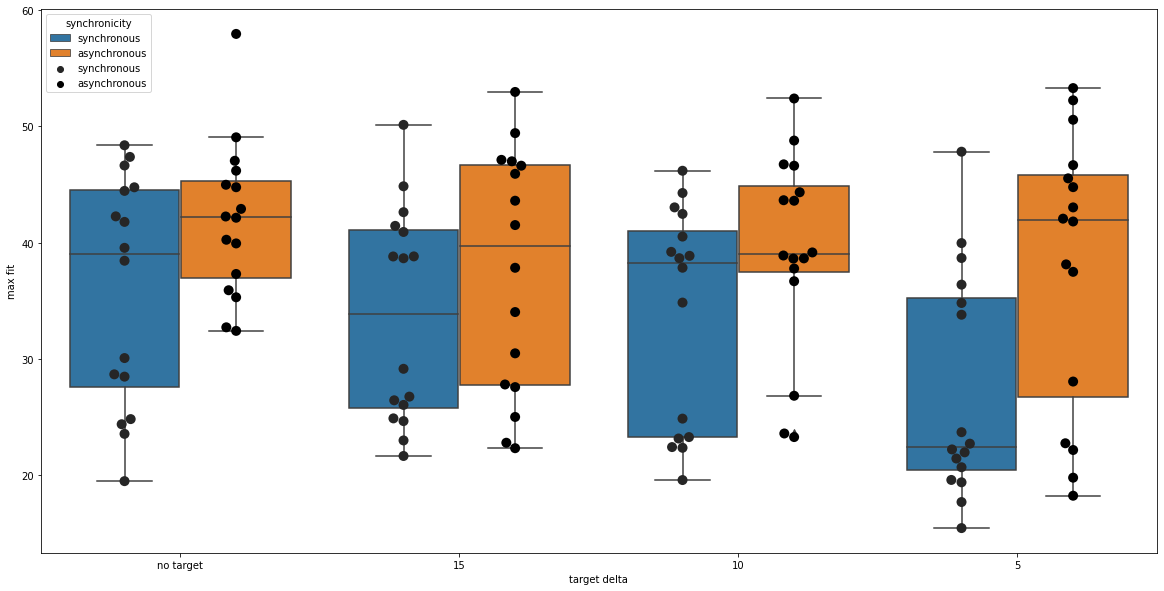

In [19]:
fig = plt.gcf()
fig.set_size_inches(20,10)
ax = sns.boxplot(data=max_data,x="target delta",y="max fit",hue="synchronicity",order=["no target","15","10","5"])
sns.swarmplot(data=max_data,x="target delta",y="max fit",hue="synchronicity",order=["no target","15","10","5"],s=10,color='k',dodge=True)

# Learning Delta and Trials

In [20]:
data_lines = []
for folder in os.listdir("/home/leni/m2w_logs/m2w_3/"):
    foldername = "/home/leni/m2w_logs/m2w_3/" + folder
    names = folder.split("_")
    synch = ""
    target = ""
    if names[0] == "swg":
        synch = "synchronous"
    elif names[0] == "awg":
        synch = "asynchronous"
    if len(names) == 3:
        target = names[2]
    else:
        target = "no target"
    for replicate in os.listdir(foldername):
        fit_lines = dlp.load_learning_data_agg(foldername + "/" + replicate)
        data_lines += [[synch,target,replicate]+fit for fit in fit_lines]
fit_data = pd.DataFrame(data=data_lines,columns=["synchronicity","target delta","replicate","time","computation time","discretized time","Number of robots","number of robots","mean delta","median delta","std delta","max delta","min delta","mean trials","median trials","std trials","max trials","min trials"])


## Synch vs Asynch

/home/leni/.local/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/leni/.local/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/leni/.local/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/leni/.local/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.

<Figure size 1440x720 with 0 Axes>

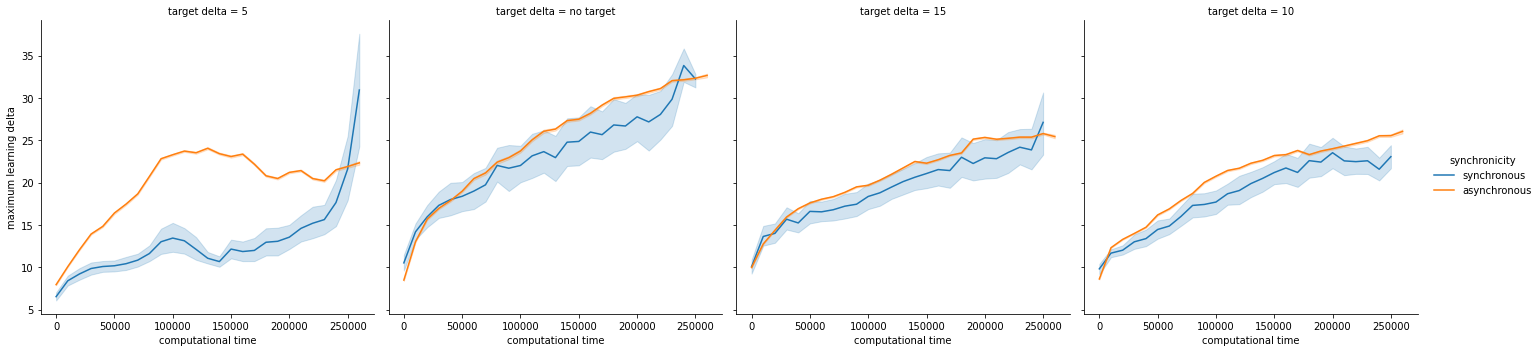

In [21]:
fig = plt.gcf()
fig.set_size_inches(20,10)
g = sns.relplot(data=fit_data,kind="line",x="discretized time",y="max delta",hue="synchronicity",col="target delta")
g.set_axis_labels("computational time","maximum learning delta")

/home/leni/.local/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/leni/.local/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/leni/.local/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/leni/.local/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.

<Figure size 1440x720 with 0 Axes>

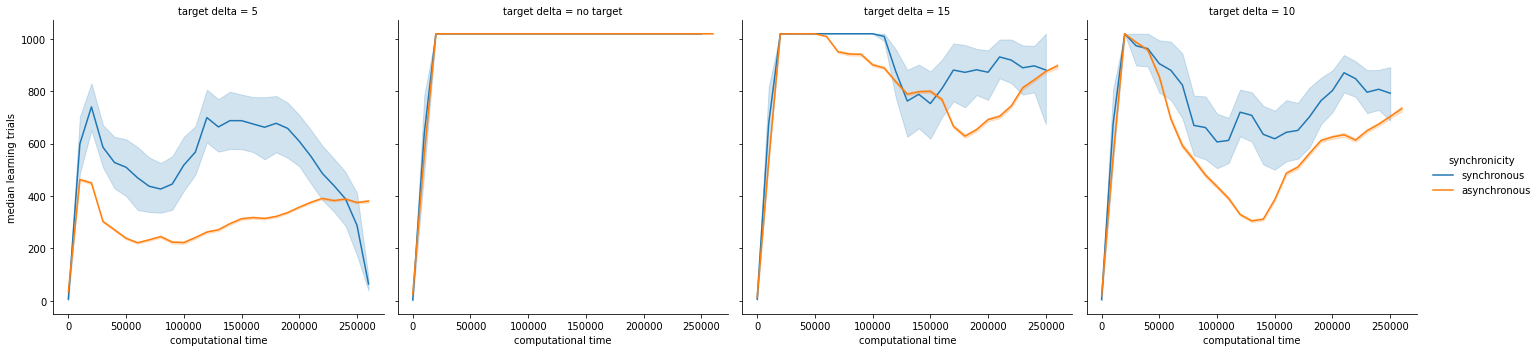

In [22]:
fig = plt.gcf()
fig.set_size_inches(20,10)
g = sns.relplot(data=fit_data,kind="line",x="discretized time",y="median trials",hue="synchronicity",col="target delta")
g.set_axis_labels("computational time","median learning trials")

## Target Deltas Values

/home/leni/.local/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/leni/.local/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/leni/.local/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/leni/.local/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.

<Figure size 1440x720 with 0 Axes>

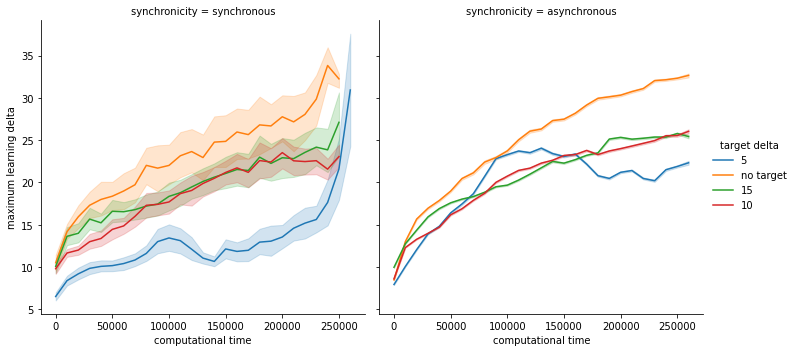

In [23]:
fig = plt.gcf()
fig.set_size_inches(20,10)
g = sns.relplot(data=fit_data,kind="line",x="discretized time",y="max delta",hue="target delta",col="synchronicity")
g.set_axis_labels("computational time","maximum learning delta")

/home/leni/.local/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/leni/.local/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/leni/.local/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/leni/.local/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.

<Figure size 1440x720 with 0 Axes>

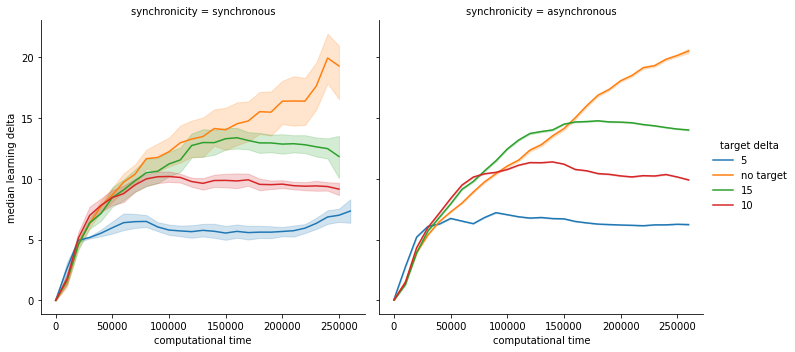

In [24]:
fig = plt.gcf()
fig.set_size_inches(20,10)
g = sns.relplot(data=fit_data,kind="line",x="discretized time",y="median delta",hue="target delta",col="synchronicity")
g.set_axis_labels("computational time","median learning delta")

/home/leni/.local/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/leni/.local/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/leni/.local/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/leni/.local/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.

<Figure size 1440x720 with 0 Axes>

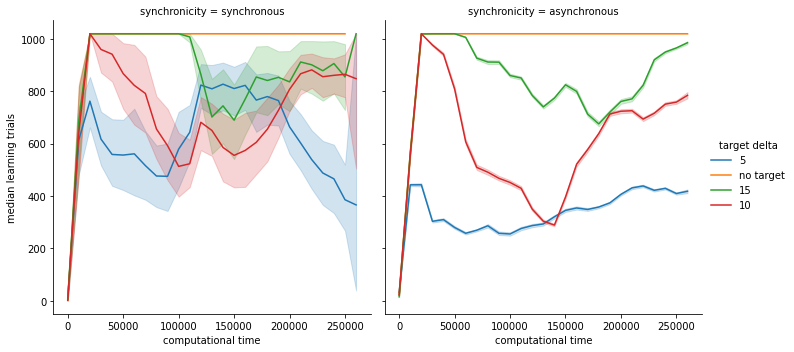

In [85]:
fig = plt.gcf()
fig.set_size_inches(20,10)
g = sns.relplot(data=fit_data,kind="line",x="discretized time",y="median trials",hue="target delta",col="synchronicity")
g.set_axis_labels("computational time","median learning trials")

# Morph Norm

In [25]:
data_lines = []
for folder in os.listdir("/home/leni/m2w_logs/m2w_3/"):
    foldername = "/home/leni/m2w_logs/m2w_3/" + folder
    names = folder.split("_")
    synch = ""
    target = ""
    if names[0] == "swg":
        synch = "synchronous"
    elif names[0] == "awg":
        synch = "asynchronous"
    if len(names) == 3:
        target = names[2]
    else:
        target = "no target"
    for replicate in os.listdir(foldername):
        fit_lines = dlp.load_morph_norms_agg(foldername + "/" + replicate)
        data_lines += [[synch,target,replicate]+fit for fit in fit_lines]
fit_data = pd.DataFrame(data=data_lines,columns=["synchronicity","target delta","replicate","time","computation time","discretized time","Number of robots","number of robots","mean morph norm","median morph norm","std morph norm","max morph norm","min morph norm"])


## Asynch vs Synch

/home/leni/.local/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/leni/.local/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/leni/.local/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/leni/.local/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.

<Figure size 1440x720 with 0 Axes>

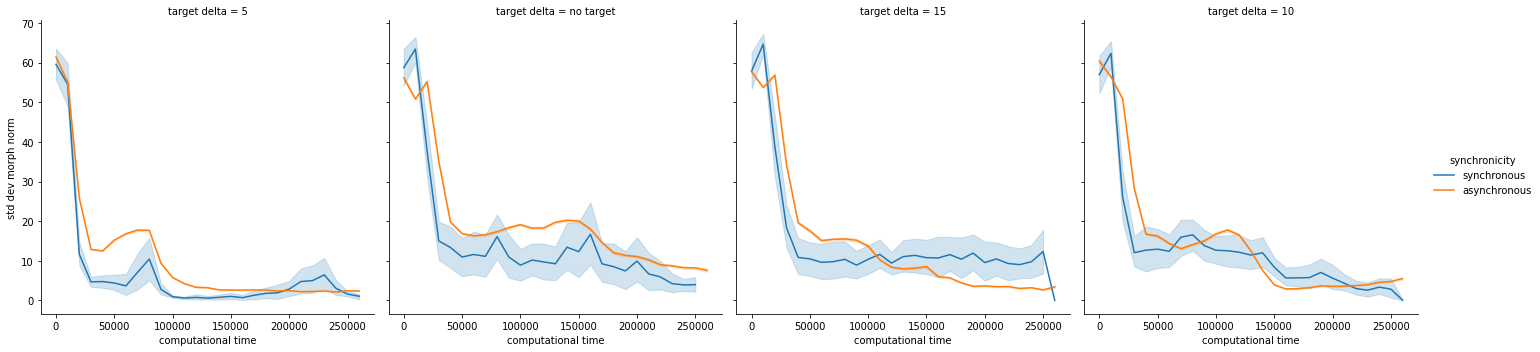

In [91]:
fig = plt.gcf()
fig.set_size_inches(20,10)
g = sns.relplot(data=fit_data,kind="line",x="discretized time",y="std morph norm",hue="synchronicity",col="target delta")
g.set_axis_labels("computational time","std dev morph norm")

/home/leni/.local/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/leni/.local/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/leni/.local/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/leni/.local/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.

<Figure size 1440x720 with 0 Axes>

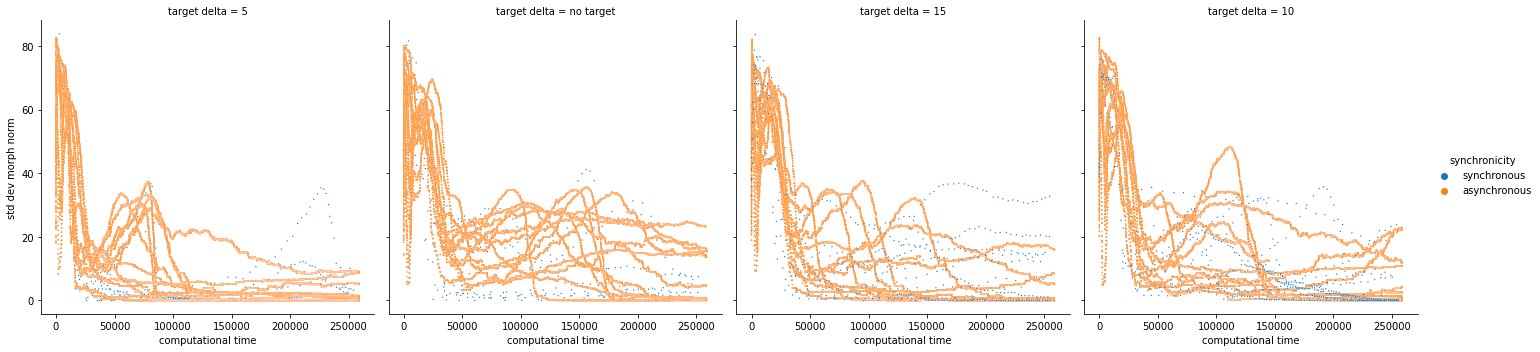

In [97]:
fig = plt.gcf()
fig.set_size_inches(20,10)
g = sns.relplot(data=fit_data,kind="scatter",s=2,x="computation time",y="std morph norm",hue="synchronicity",col="target delta")
g.set_axis_labels("computational time","std dev morph norm")

/home/leni/.local/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/leni/.local/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/leni/.local/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/leni/.local/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.

<Figure size 1440x720 with 0 Axes>

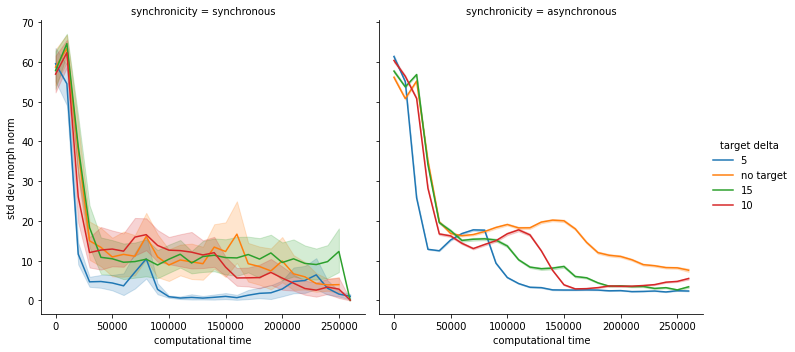

In [92]:
fig = plt.gcf()
fig.set_size_inches(20,10)
g = sns.relplot(data=fit_data,kind="line",x="discretized time",y="std morph norm",hue="target delta",col="synchronicity")
g.set_axis_labels("computational time","std dev morph norm")

/home/leni/.local/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/leni/.local/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/leni/.local/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/leni/.local/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.

<Figure size 1440x720 with 0 Axes>

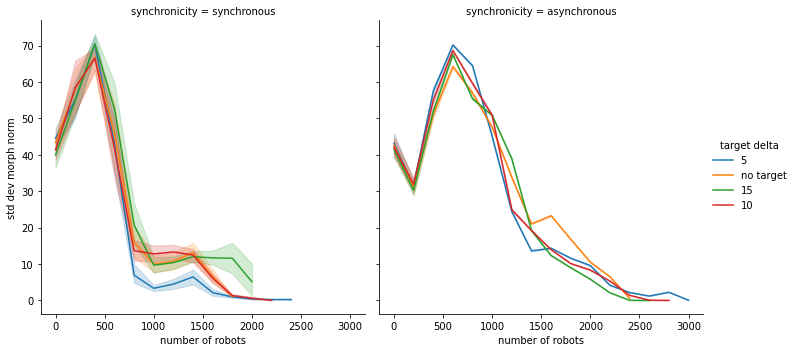

In [101]:
fig = plt.gcf()
fig.set_size_inches(20,10)
g = sns.relplot(data=fit_data,kind="line",x="Number of robots",y="std morph norm",hue="target delta",col="synchronicity")
g.set_axis_labels("number of robots","std dev morph norm")

/home/leni/.local/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/leni/.local/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/leni/.local/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/leni/.local/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.

<Figure size 14400x720 with 0 Axes>

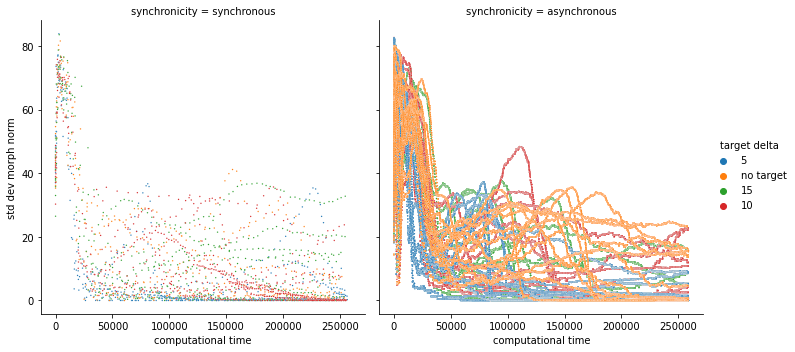

In [100]:
fig = plt.gcf()
fig.set_size_inches(200,10)
g = sns.relplot(data=fit_data,kind="scatter",s=2,x="computation time",y="std morph norm",hue="target delta",col="synchronicity")
g.set_axis_labels("computational time","std dev morph norm")

/home/leni/.local/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/leni/.local/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/leni/.local/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/leni/.local/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.

<Figure size 1440x720 with 0 Axes>

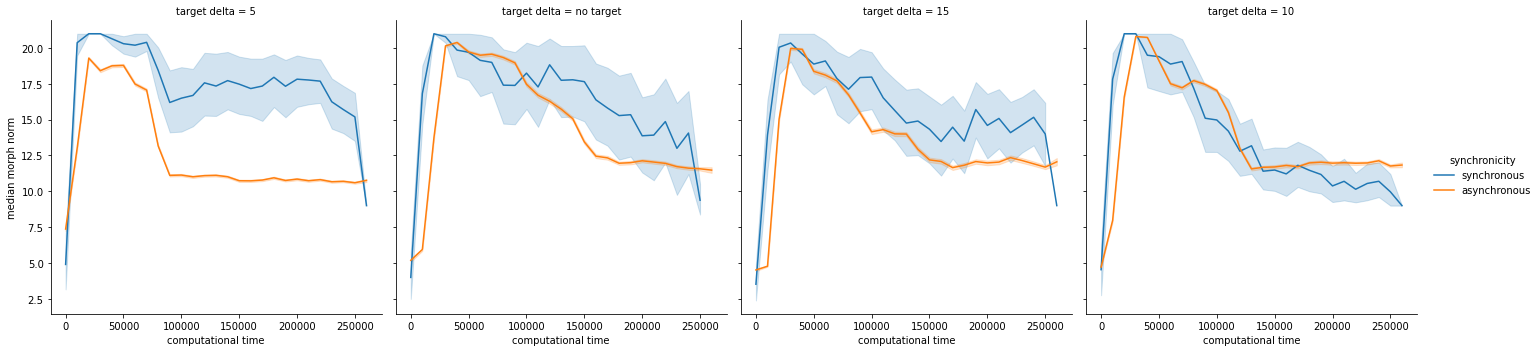

In [94]:
fig = plt.gcf()
fig.set_size_inches(20,10)
g = sns.relplot(data=fit_data,kind="line",x="discretized time",y="median morph norm",hue="synchronicity",col="target delta")
g.set_axis_labels("computational time","median morph norm")